# Exploratory Data Analysis (EDA) - Fraud Detection Dataset

This notebook performs comprehensive exploratory data analysis on the fraud detection dataset.

## Objectives
1. Load and inspect the dataset
2. Understand data structure and types
3. Analyze missing values
4. Explore distributions of features
5. Identify patterns and relationships
6. Feature engineering insights


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import os

# Set style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set random seed
np.random.seed(42)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")


Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.4
Seaborn version: 0.13.2


In [2]:
# Load the dataset
data_path = Path('../../data/fraud_data.csv')

# Check if file exists
if not data_path.exists():
    print(f"Error: File not found at {data_path}")
    print("Please ensure the dataset is in the data/ directory")
else:
    # Load data
    df = pd.read_csv(data_path)
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Dataset loaded successfully!
Shape: (59054, 434)
Memory usage: 251.41 MB


In [3]:
# Display first few rows
print("First 5 rows:")
display(df.head())

print("\n" + "="*80 + "\n")

# Display last few rows
print("Last 5 rows:")
display(df.tail())


First 5 rows:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.000,150.000,visa,226.000,credit,269.000,87.000,NaN,NaN,yahoo.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.000,NaN,NaN,NaN,NaN,NaN,NaN,7.792,0.792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000,15.000,136.000,0.000,0.000,0.000,0.000,1822.000,47.000,64.000,0.000,0.000,0.000,0.000,0.000,0.000,15951.990,198853.766,0.000,0.000,0.000,915.000,5975.000,1320.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.



Last 5 rows:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
59049,3549150,0,14898396,335.000,W,2616,327.000,150.000,discover,102.000,credit,325.000,87.000,NaN,NaN,hotmail.com,NaN,3,1,0,0,0,1,0,0,2,0,1,0,3,3,0.000,NaN,NaN,236.000,159.000,NaN,NaN,NaN,NaN,236.000,0.000,NaN,NaN,NaN,236.000,T,F,F,M0,F,T,F,F,F,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

In [4]:
# Basic information about the dataset
print("Dataset Info:")
print("="*80)
df.info()

print("\n" + "="*80 + "\n")
print("Dataset Summary Statistics:")
print("="*80)
display(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 195.5+ MB


Dataset Summary Statistics:


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,59054.000,59054.000,59054.000,59054.000,59054.000,58139.000,58896.000,58610.000,52326.000,52326.000,23701.000,3872.000,59054.000,59054.000,59054.000,59054.000,59054.000,59054.000,59054.000,59054.000,59054.000,59054.000,59054.000,59054.000,59054.000,59054.000,58933.000,31100.000,32839.000,42208.000,28075.000,7421.000,3947.000,7553.000,7553.000,51514.000,30902.000,6580.000,6324.000,6317.000,50084.000,30902.000,30902.000,30902.000,30902.000,30902.000,30902.000,30902.000,30902.000,30902.000,30902.000,30902.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,51509.000,42202.000,42202.000,42202.000,42202.000,42202.000,42202.000,42202.000,42202.000,42202.000,42202.000,42202.000,42202.000,42202.000,42202.000,42202.000,42202.000,42202.000,42202.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,51373.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,50079.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,59020.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,8166.000,14057.000,14057.000,14072.000,14072.00

Target Variable Distribution:

Counts:
isFraud
0    57049
1     2005
Name: count, dtype: int64

Percentages:
isFraud
0   96.605
1    3.395
Name: proportion, dtype: float64


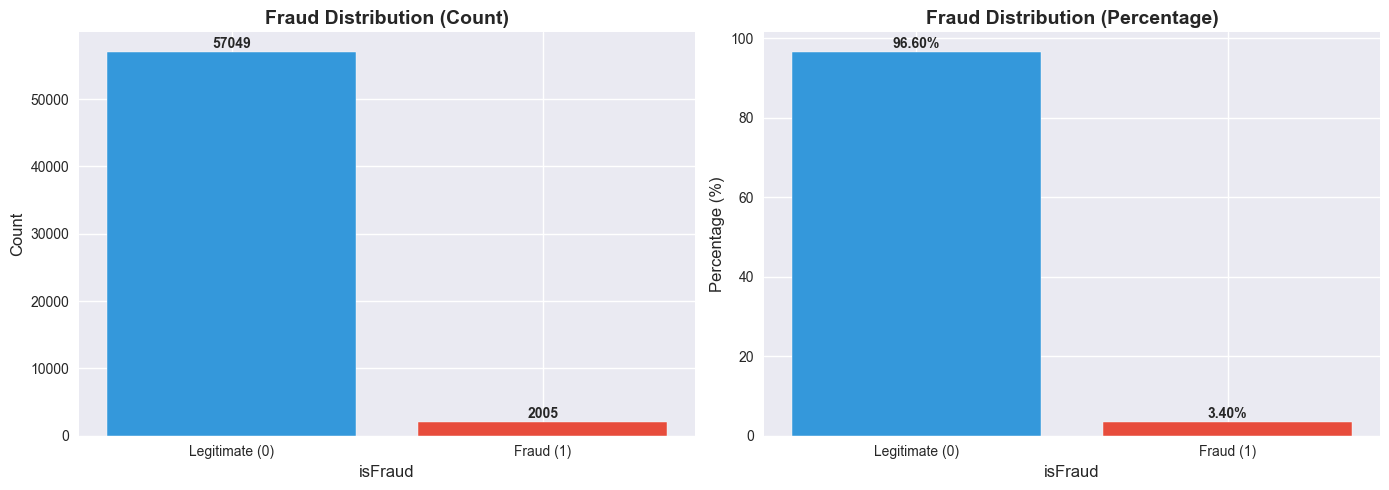


Fraud Rate: 0.0340 (3.40%)
Class Imbalance Ratio: 28.45:1


In [5]:
# Check target variable distribution
print("Target Variable Distribution:")
print("="*80)
target_counts = df['isFraud'].value_counts()
target_percentages = df['isFraud'].value_counts(normalize=True) * 100

print(f"\nCounts:")
print(target_counts)
print(f"\nPercentages:")
print(target_percentages)

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(target_counts.index, target_counts.values, color=['#3498db', '#e74c3c'])
axes[0].set_xlabel('isFraud', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Fraud Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Legitimate (0)', 'Fraud (1)'])
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + max(target_counts.values)*0.01, str(v), ha='center', fontweight='bold')

# Percentage plot
axes[1].bar(target_percentages.index, target_percentages.values, color=['#3498db', '#e74c3c'])
axes[1].set_xlabel('isFraud', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_title('Fraud Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Legitimate (0)', 'Fraud (1)'])
for i, v in enumerate(target_percentages.values):
    axes[1].text(i, v + max(target_percentages.values)*0.01, f'{v:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../../outputs/figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nFraud Rate: {df['isFraud'].mean():.4f} ({df['isFraud'].mean()*100:.2f}%)")
print(f"Class Imbalance Ratio: {target_counts[0] / target_counts[1]:.2f}:1")


Missing Values Analysis:
Total columns with missing values: 414
Total missing values: 11544335
Percentage of missing data: 45.04%

Top 20 columns with most missing values:


,Column,Missing_Count,Missing_Percentage,Data_Type
id_24,id_24,58567,99.175,float64
id_25,id_25,58530,99.113,float64
id_22,id_22,58529,99.111,float64
id_23,id_23,58529,99.111,object
id_08,id_08,58529,99.111,float64
id_07,id_07,58529,99.111,float64
id_21,id_21,58529,99.111,float64
id_26,id_26,58529,99.111,float64
id_27,id_27,58529,99.111,object
dist2,dist2,55182,93.443,float64


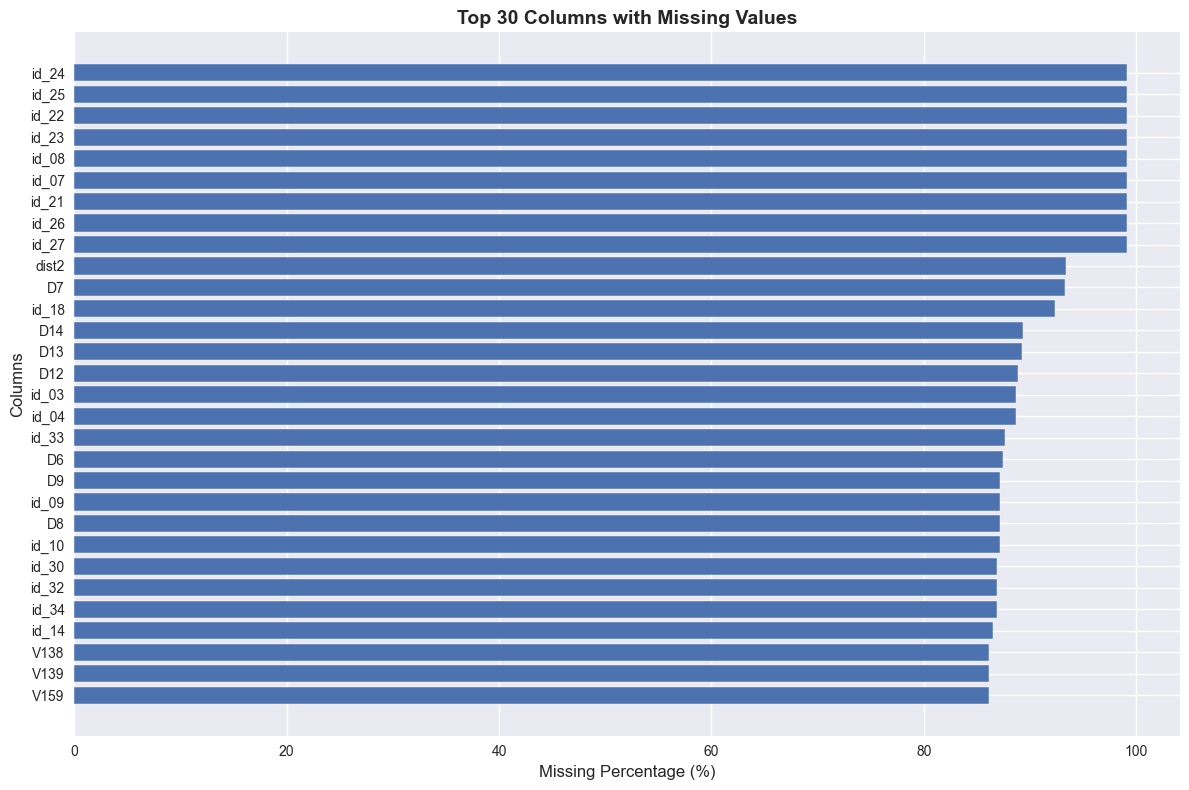

In [6]:
# Missing values analysis
print("Missing Values Analysis:")
print("="*80)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print(f"Total columns with missing values: {len(missing_data)}")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

if len(missing_data) > 0:
    print("\nTop 20 columns with most missing values:")
    display(missing_data.head(20))
    
    # Visualize missing values
    if len(missing_data) > 0:
        plt.figure(figsize=(12, 8))
        top_missing = missing_data.head(30)
        plt.barh(range(len(top_missing)), top_missing['Missing_Percentage'].values)
        plt.yticks(range(len(top_missing)), top_missing['Column'].values)
        plt.xlabel('Missing Percentage (%)', fontsize=12)
        plt.ylabel('Columns', fontsize=12)
        plt.title('Top 30 Columns with Missing Values', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig('../../outputs/figures/missing_values.png', dpi=300, bbox_inches='tight')
        plt.show()
else:
    print("No missing values found in the dataset!")


In [7]:
# Data types analysis
print("Data Types Analysis:")
print("="*80)

data_types = pd.DataFrame({
    'Data_Type': df.dtypes.value_counts().index.astype(str),
    'Count': df.dtypes.value_counts().values
})

print("Data types distribution:")
display(data_types)

# Categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical columns: {len(categorical_cols)}")
print(f"Numerical columns: {len(numerical_cols)}")

print(f"\nCategorical columns: {categorical_cols[:10]}...") if len(categorical_cols) > 10 else print(f"Categorical columns: {categorical_cols}")
print(f"\nNumerical columns (first 10): {numerical_cols[:10]}...") if len(numerical_cols) > 10 else print(f"Numerical columns: {numerical_cols}")


Data Types Analysis:
Data types distribution:


,Data_Type,Count
0,float64,385
1,object,31
2,int64,18



Categorical columns: 31
Numerical columns: 403

Categorical columns: ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5']...

Numerical columns (first 10): ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2']...


In [8]:
# Analyze key numerical features
key_numerical_features = ['TransactionAmt', 'TransactionDT', 'card1', 'card2', 'card3', 'card5', 
                          'addr1', 'addr2', 'dist1', 'dist2']

# Filter to only include columns that exist
key_numerical_features = [col for col in key_numerical_features if col in df.columns]

print("Key Numerical Features Summary:")
print("="*80)
display(df[key_numerical_features].describe())


Key Numerical Features Summary:


,TransactionAmt,TransactionDT,card1,card2,card3,card5,addr1,addr2,dist1,dist2
count,59054.000,59054.000,59054.000,58139.000,58896.000,58610.000,52326.000,52326.000,23701.000,3872.000
mean,134.143,7368220.086,9910.366,362.438,153.265,199.104,290.654,86.807,115.656,215.529
std,233.112,4612063.430,4893.705,157.361,11.396,41.296,101.797,2.640,366.462,506.825
min,0.292,86730.000,1008.000,100.000,100.000,100.000,100.000,13.000,0.000,0.000
25%,42.950,3074217.000,6019.000,215.000,150.000,166.000,204.000,87.000,3.000,7.000
50%,68.017,7288450.500,9749.000,361.000,150.000,226.000,299.000,87.000,8.000,33.000
75%,117.000,11239178.500,14223.000,512.000,150.000,226.000,330.000,87.000,24.000,199.000
max,5279.950,15811049.000,18390.000,600.000,229.000,237.000,536.000,102.000,6818.000,7104.000


Transaction Amount Analysis:


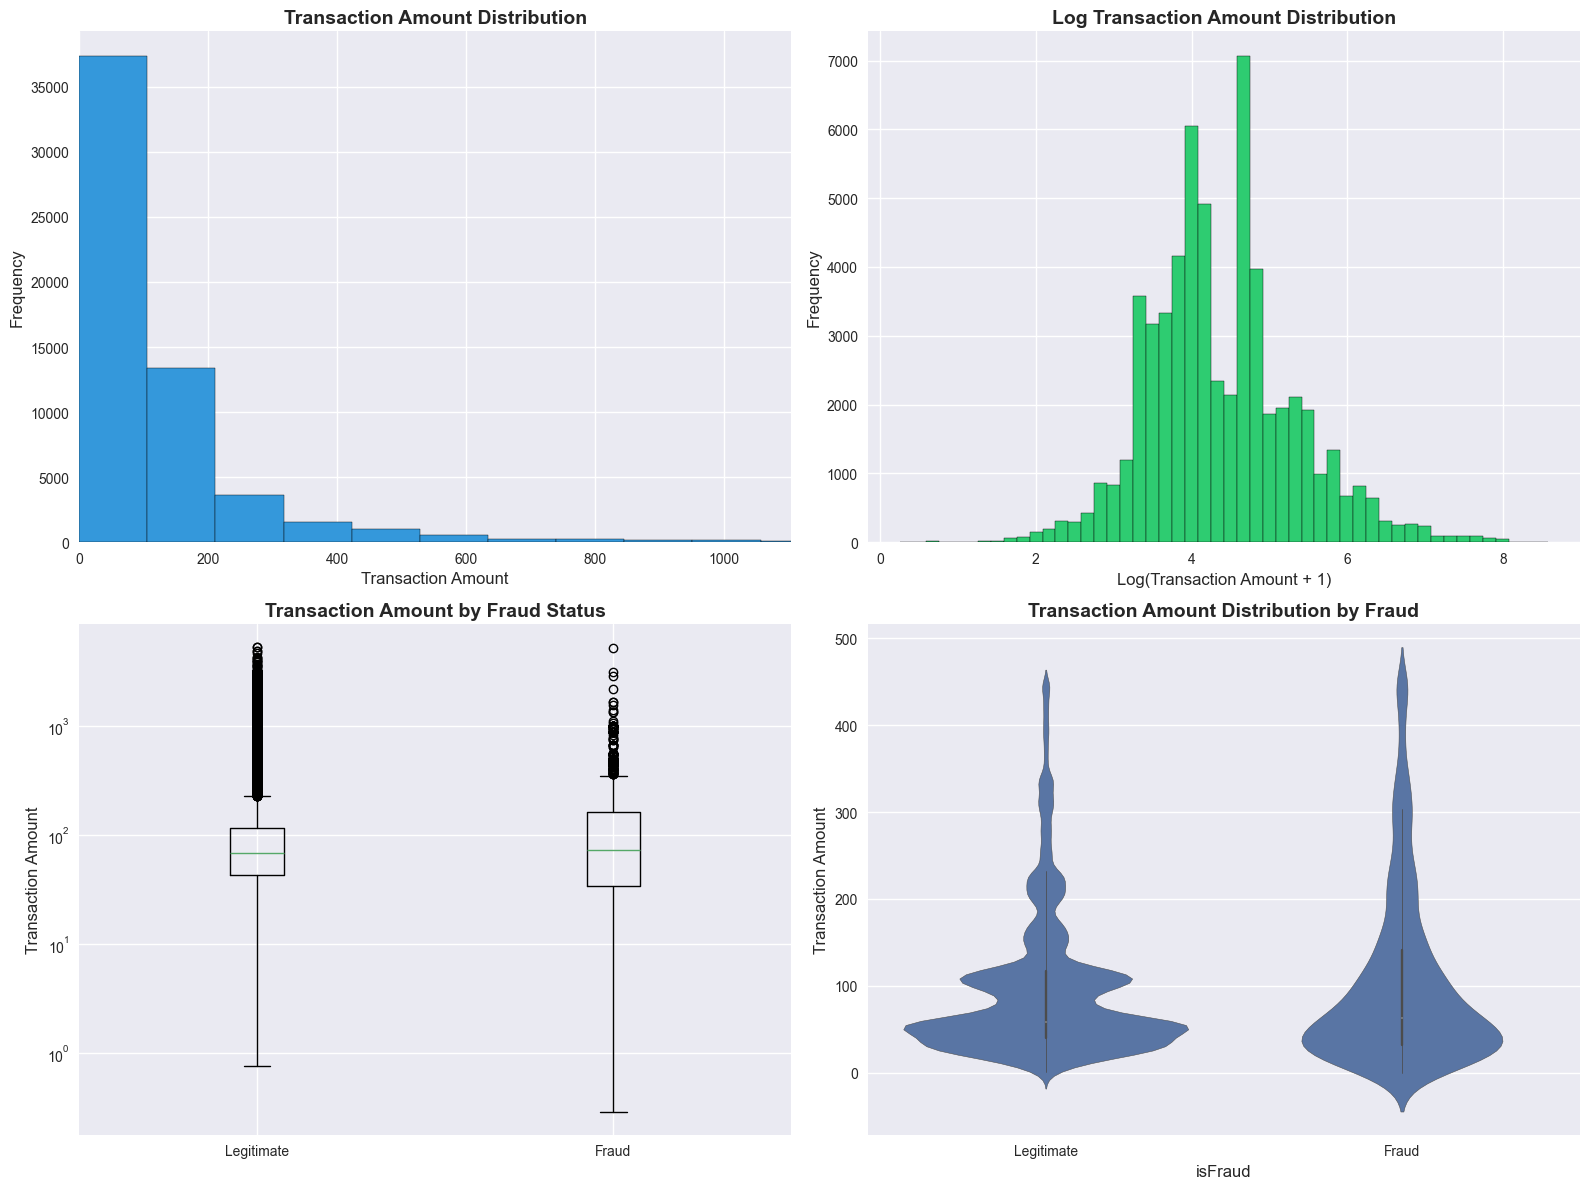


Transaction Amount Statistics by Fraud Status:


,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,57049.000,133.689,232.864,0.758,42.994,67.950,117.000,5279.950
1,2005.000,147.068,239.780,0.292,34.000,72.950,160.950,5191.000


In [9]:
# Transaction Amount Analysis
if 'TransactionAmt' in df.columns:
    print("Transaction Amount Analysis:")
    print("="*80)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Distribution
    axes[0, 0].hist(df['TransactionAmt'], bins=50, color='#3498db', edgecolor='black')
    axes[0, 0].set_xlabel('Transaction Amount', fontsize=12)
    axes[0, 0].set_ylabel('Frequency', fontsize=12)
    axes[0, 0].set_title('Transaction Amount Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlim(0, df['TransactionAmt'].quantile(0.99))  # Remove extreme outliers for better visualization
    
    # Log distribution
    log_trans_amt = np.log1p(df['TransactionAmt'])
    axes[0, 1].hist(log_trans_amt, bins=50, color='#2ecc71', edgecolor='black')
    axes[0, 1].set_xlabel('Log(Transaction Amount + 1)', fontsize=12)
    axes[0, 1].set_ylabel('Frequency', fontsize=12)
    axes[0, 1].set_title('Log Transaction Amount Distribution', fontsize=14, fontweight='bold')
    
    # Box plot by fraud status
    fraud_data = [df[df['isFraud']==0]['TransactionAmt'], df[df['isFraud']==1]['TransactionAmt']]
    axes[1, 0].boxplot(fraud_data, labels=['Legitimate', 'Fraud'])
    axes[1, 0].set_ylabel('Transaction Amount', fontsize=12)
    axes[1, 0].set_title('Transaction Amount by Fraud Status', fontsize=14, fontweight='bold')
    axes[1, 0].set_yscale('log')
    
    # Violin plot
    df_temp = df[df['TransactionAmt'] <= df['TransactionAmt'].quantile(0.95)]
    sns.violinplot(data=df_temp, x='isFraud', y='TransactionAmt', ax=axes[1, 1])
    axes[1, 1].set_xlabel('isFraud', fontsize=12)
    axes[1, 1].set_ylabel('Transaction Amount', fontsize=12)
    axes[1, 1].set_title('Transaction Amount Distribution by Fraud', fontsize=14, fontweight='bold')
    axes[1, 1].set_xticklabels(['Legitimate', 'Fraud'])
    
    plt.tight_layout()
    plt.savefig('../../outputs/figures/transaction_amount_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Statistical summary by fraud status
    print("\nTransaction Amount Statistics by Fraud Status:")
    display(df.groupby('isFraud')['TransactionAmt'].describe())


In [10]:
# Categorical features analysis
categorical_features = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType']

# Filter to only include columns that exist
categorical_features = [col for col in categorical_features if col in df.columns]

print("Categorical Features Analysis:")
print("="*80)

for col in categorical_features[:5]:  # Analyze first 5 categorical features
    if col in df.columns:
        print(f"\n{col}:")
        print("-" * 40)
        value_counts = df[col].value_counts()
        print(f"Unique values: {df[col].nunique()}")
        print(f"Top 10 values:")
        display(value_counts.head(10))
        
        # Fraud rate by category (if not too many categories)
        if df[col].nunique() <= 20:
            fraud_by_cat = df.groupby(col)['isFraud'].agg(['mean', 'count']).sort_values('mean', ascending=False)
            fraud_by_cat.columns = ['Fraud_Rate', 'Count']
            print(f"\nFraud rate by {col}:")
            display(fraud_by_cat.head(10))


Categorical Features Analysis:

ProductCD:
----------------------------------------
Unique values: 5
Top 10 values:


ProductCD
W    43840
C     7003
R     3758
H     3284
S     1169
Name: count, dtype: int64


Fraud rate by ProductCD:


,Fraud_Rate,Count
ProductCD,,
C,0.113,7003
S,0.056,1169
H,0.048,3284
R,0.036,3758
W,0.020,43840



card4:
----------------------------------------
Unique values: 4
Top 10 values:


card4
visa                38343
mastercard          19042
american express      831
discover              676
Name: count, dtype: int64


Fraud rate by card4:


,Fraud_Rate,Count
card4,,
discover,0.075,676
visa,0.034,38343
mastercard,0.033,19042
american express,0.030,831



card6:
----------------------------------------
Unique values: 4
Top 10 values:


card6
debit              44127
credit             14764
debit or credit        3
charge card            1
Name: count, dtype: int64


Fraud rate by card6:


,Fraud_Rate,Count
card6,,
credit,0.065,14764
debit,0.024,44127
charge card,0.000,1
debit or credit,0.000,3



P_emaildomain:
----------------------------------------
Unique values: 59
Top 10 values:


P_emaildomain
gmail.com        22917
yahoo.com         9989
hotmail.com       4532
anonymous.com     3766
aol.com           2842
comcast.net        785
icloud.com         628
outlook.com        495
att.net            418
msn.com            412
Name: count, dtype: int64


R_emaildomain:
----------------------------------------
Unique values: 58
Top 10 values:


R_emaildomain
gmail.com        5767
hotmail.com      2749
anonymous.com    2102
yahoo.com        1173
aol.com           375
outlook.com       241
comcast.net       180
yahoo.com.mx      165
icloud.com        137
msn.com           101
Name: count, dtype: int64

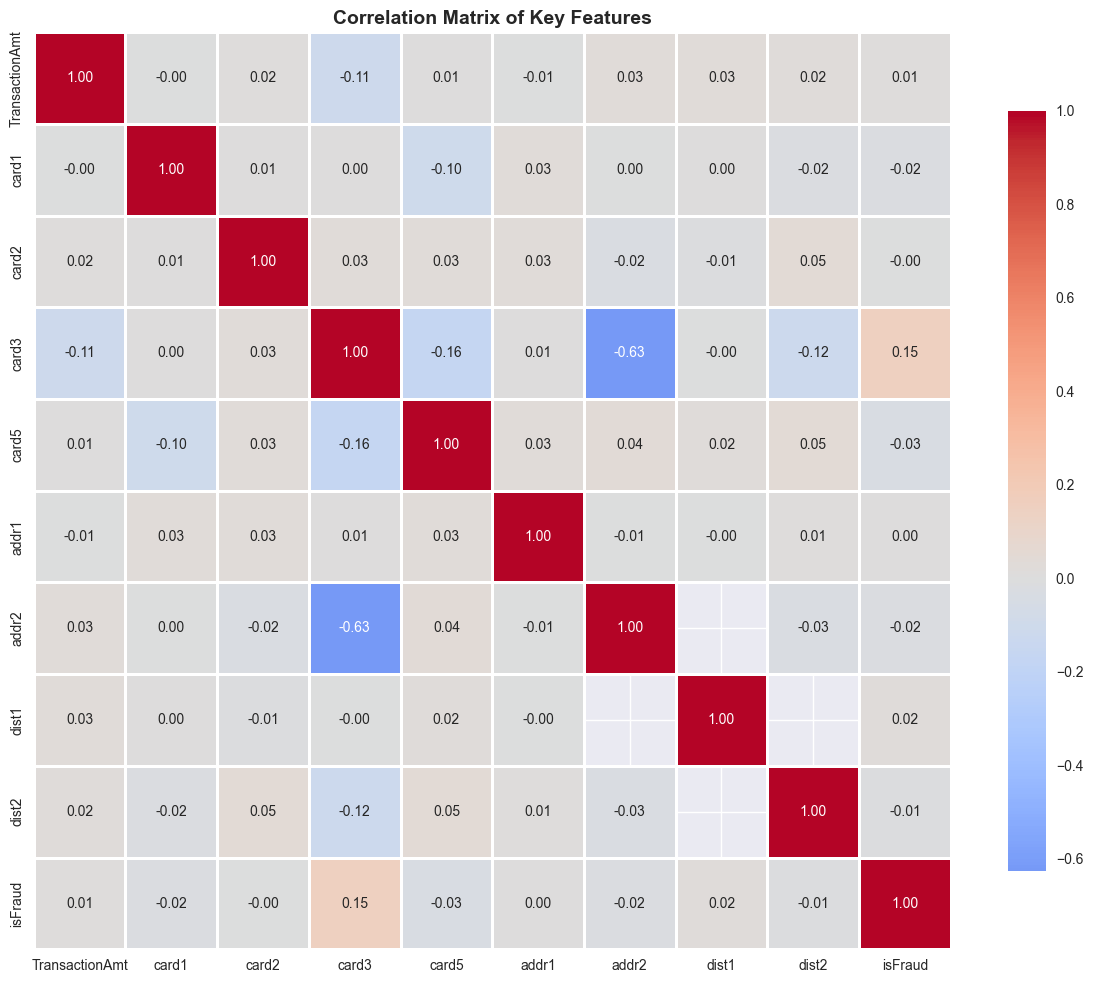

Features most correlated with Fraud:


isFraud           1.000
card3             0.153
dist1             0.020
TransactionAmt    0.010
addr1             0.005
card2            -0.002
dist2            -0.012
card1            -0.016
addr2            -0.020
card5            -0.032
Name: isFraud, dtype: float64

In [11]:
# Correlation analysis for key numerical features
key_features = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 
                'addr1', 'addr2', 'dist1', 'dist2', 'isFraud']

# Filter to only include columns that exist
key_features = [col for col in key_features if col in df.columns and df[col].dtype in [np.int64, np.float64]]

if len(key_features) > 1:
    # Calculate correlation matrix
    corr_matrix = df[key_features].corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Key Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('../../outputs/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Features most correlated with fraud
    if 'isFraud' in corr_matrix.columns:
        fraud_corr = corr_matrix['isFraud'].sort_values(ascending=False)
        print("Features most correlated with Fraud:")
        print("="*80)
        display(fraud_corr)


In [12]:
# Feature groups analysis
print("Feature Groups Analysis:")
print("="*80)

# C features
c_features = [col for col in df.columns if col.startswith('C') and col[1:].isdigit()]
print(f"C features: {len(c_features)}")
if c_features:
    print(f"Sample C features: {c_features[:5]}")

# D features
d_features = [col for col in df.columns if col.startswith('D') and col[1:].isdigit()]
print(f"\nD features: {len(d_features)}")
if d_features:
    print(f"Sample D features: {d_features[:5]}")

# M features
m_features = [col for col in df.columns if col.startswith('M') and col[1:].isdigit()]
print(f"\nM features: {len(m_features)}")
if m_features:
    print(f"Sample M features: {m_features[:5]}")

# V features
v_features = [col for col in df.columns if col.startswith('V') and col[1:].isdigit()]
print(f"\nV features: {len(v_features)}")
if v_features:
    print(f"Sample V features: {v_features[:5]}")

# ID features
id_features = [col for col in df.columns if col.startswith('id_')]
print(f"\nID features: {len(id_features)}")
if id_features:
    print(f"Sample ID features: {id_features[:5]}")


Feature Groups Analysis:
C features: 14
Sample C features: ['C1', 'C2', 'C3', 'C4', 'C5']

D features: 15
Sample D features: ['D1', 'D2', 'D3', 'D4', 'D5']

M features: 9
Sample M features: ['M1', 'M2', 'M3', 'M4', 'M5']

V features: 339
Sample V features: ['V1', 'V2', 'V3', 'V4', 'V5']

ID features: 38
Sample ID features: ['id_01', 'id_02', 'id_03', 'id_04', 'id_05']


In [13]:
# Summary statistics for feature groups
feature_groups = {
    'C_features': [col for col in df.columns if col.startswith('C') and col[1:].isdigit()],
    'D_features': [col for col in df.columns if col.startswith('D') and col[1:].isdigit()],
    'V_features': [col for col in df.columns if col.startswith('V') and col[1:].isdigit()],
    'id_features': [col for col in df.columns if col.startswith('id_')]
}

print("Feature Groups Summary:")
print("="*80)

for group_name, features in feature_groups.items():
    if features:
        # Filter to numerical features only
        numerical_features = [f for f in features if df[f].dtype in [np.int64, np.float64]]
        if numerical_features:
            print(f"\n{group_name} ({len(numerical_features)} numerical features):")
            summary = df[numerical_features].describe()
            print(f"Mean of means: {summary.loc['mean'].mean():.4f}")
            print(f"Std of means: {summary.loc['mean'].std():.4f}")
            print(f"Missing values: {df[numerical_features].isnull().sum().sum()}")
            print(f"Missing percentage: {(df[numerical_features].isnull().sum().sum() / (len(df) * len(numerical_features))) * 100:.2f}%")


Feature Groups Summary:

C_features (14 numerical features):
Mean of means: 8.1455
Std of means: 7.8623
Missing values: 0
Missing percentage: 0.00%

D_features (15 numerical features):
Mean of means: 86.4276
Std of means: 57.2806
Missing values: 514460
Missing percentage: 58.08%

V_features (339 numerical features):
Mean of means: 194.9087
Std of means: 2515.0163
Missing values: 8609843
Missing percentage: 43.01%

id_features (23 numerical features):
Mean of means: 7658.8972
Std of means: 36374.1763
Missing values: 1180262
Missing percentage: 86.90%


Time-based Analysis:


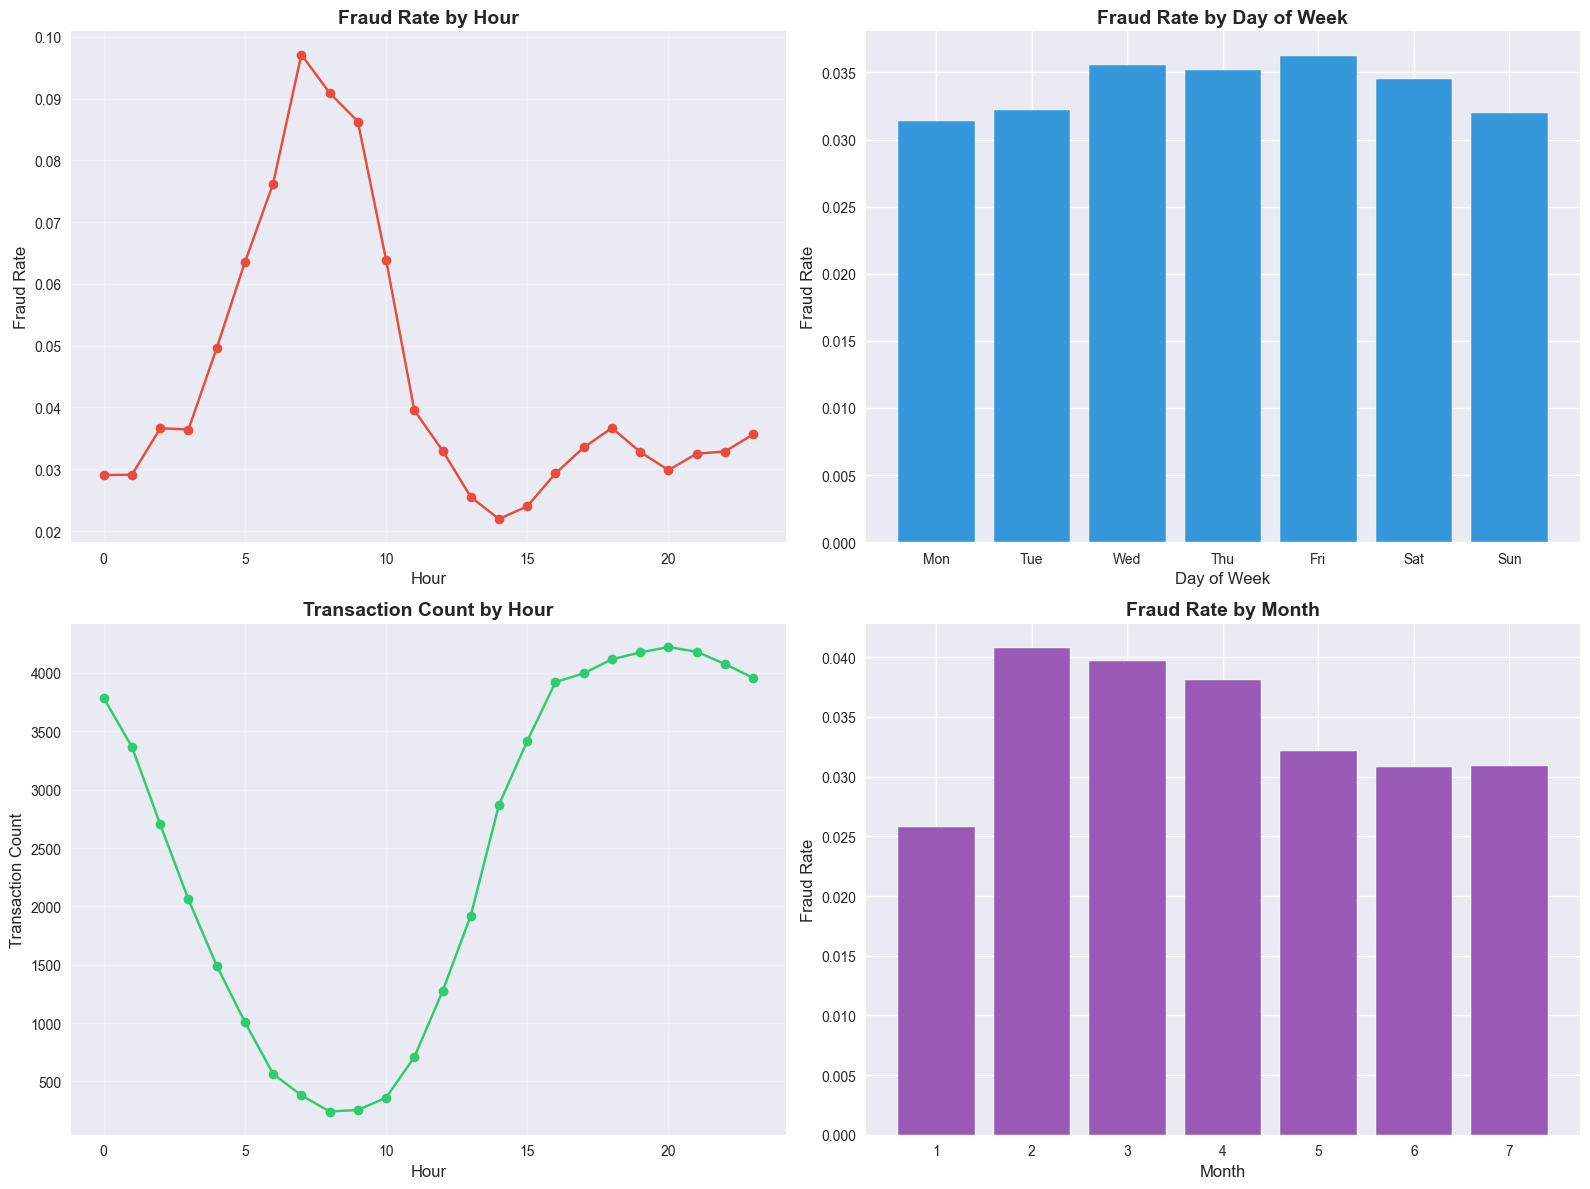


Fraud rate by hour:


Hour
0    0.029
1    0.029
2    0.037
3    0.036
4    0.050
5    0.063
6    0.076
7    0.097
8    0.091
9    0.086
10   0.064
11   0.040
12   0.033
13   0.026
14   0.022
15   0.024
16   0.029
17   0.034
18   0.037
19   0.033
20   0.030
21   0.033
22   0.033
23   0.036
Name: isFraud, dtype: float64


Fraud rate by day of week:


DayOfWeek
0   0.031
1   0.032
2   0.036
3   0.035
4   0.036
5   0.035
6   0.032
Name: isFraud, dtype: float64

In [14]:
# Time-based analysis (if TransactionDT exists)
if 'TransactionDT' in df.columns:
    print("Time-based Analysis:")
    print("="*80)
    
    # Convert TransactionDT to datetime (assuming it's in seconds since a reference point)
    # You may need to adjust this based on your actual timestamp format
    df['TransactionDate'] = pd.to_datetime(df['TransactionDT'], unit='s', errors='coerce')
    
    if df['TransactionDate'].notna().sum() > 0:
        # Extract time features
        df['Hour'] = df['TransactionDate'].dt.hour
        df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek
        df['DayOfMonth'] = df['TransactionDate'].dt.day
        df['Month'] = df['TransactionDate'].dt.month
        
        # Fraud rate by hour
        fraud_by_hour = df.groupby('Hour')['isFraud'].mean()
        
        # Plot
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Fraud rate by hour
        axes[0, 0].plot(fraud_by_hour.index, fraud_by_hour.values, marker='o', color='#e74c3c')
        axes[0, 0].set_xlabel('Hour', fontsize=12)
        axes[0, 0].set_ylabel('Fraud Rate', fontsize=12)
        axes[0, 0].set_title('Fraud Rate by Hour', fontsize=14, fontweight='bold')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Fraud rate by day of week
        fraud_by_dow = df.groupby('DayOfWeek')['isFraud'].mean()
        day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        axes[0, 1].bar(range(len(fraud_by_dow)), fraud_by_dow.values, color='#3498db')
        axes[0, 1].set_xticks(range(len(fraud_by_dow)))
        axes[0, 1].set_xticklabels([day_names[i] for i in range(len(fraud_by_dow))])
        axes[0, 1].set_xlabel('Day of Week', fontsize=12)
        axes[0, 1].set_ylabel('Fraud Rate', fontsize=12)
        axes[0, 1].set_title('Fraud Rate by Day of Week', fontsize=14, fontweight='bold')
        
        # Transaction count by hour
        count_by_hour = df.groupby('Hour').size()
        axes[1, 0].plot(count_by_hour.index, count_by_hour.values, marker='o', color='#2ecc71')
        axes[1, 0].set_xlabel('Hour', fontsize=12)
        axes[1, 0].set_ylabel('Transaction Count', fontsize=12)
        axes[1, 0].set_title('Transaction Count by Hour', fontsize=14, fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3)
        
        # Fraud rate by month
        fraud_by_month = df.groupby('Month')['isFraud'].mean()
        axes[1, 1].bar(fraud_by_month.index, fraud_by_month.values, color='#9b59b6')
        axes[1, 1].set_xlabel('Month', fontsize=12)
        axes[1, 1].set_ylabel('Fraud Rate', fontsize=12)
        axes[1, 1].set_title('Fraud Rate by Month', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('../../outputs/figures/time_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\nFraud rate by hour:")
        display(fraud_by_hour)
        print("\nFraud rate by day of week:")
        display(fraud_by_dow)


In [15]:
# Key Insights and Summary
print("="*80)
print("EDA SUMMARY AND KEY INSIGHTS")
print("="*80)

print(f"\n1. Dataset Overview:")
print(f"   - Total rows: {len(df):,}")
print(f"   - Total columns: {len(df.columns)}")
print(f"   - Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n2. Target Variable:")
print(f"   - Fraud rate: {df['isFraud'].mean():.4f} ({df['isFraud'].mean()*100:.2f}%)")
print(f"   - Legitimate transactions: {(df['isFraud']==0).sum():,}")
print(f"   - Fraudulent transactions: {(df['isFraud']==1).sum():,}")
print(f"   - Class imbalance ratio: {(df['isFraud']==0).sum() / (df['isFraud']==1).sum():.2f}:1")

print(f"\n3. Missing Values:")
missing_total = df.isnull().sum().sum()
missing_pct = (missing_total / (df.shape[0] * df.shape[1])) * 100
print(f"   - Total missing values: {missing_total:,}")
print(f"   - Percentage: {missing_pct:.2f}%")
print(f"   - Columns with missing values: {(df.isnull().sum() > 0).sum()}")

print(f"\n4. Data Types:")
print(f"   - Categorical columns: {len(df.select_dtypes(include=['object']).columns)}")
print(f"   - Numerical columns: {len(df.select_dtypes(include=[np.number]).columns)}")

if 'TransactionAmt' in df.columns:
    print(f"\n5. Transaction Amount:")
    print(f"   - Mean: ${df['TransactionAmt'].mean():.2f}")
    print(f"   - Median: ${df['TransactionAmt'].median():.2f}")
    print(f"   - Std: ${df['TransactionAmt'].std():.2f}")
    print(f"   - Min: ${df['TransactionAmt'].min():.2f}")
    print(f"   - Max: ${df['TransactionAmt'].max():.2f}")
    fraud_mean_amt = df[df['isFraud']==1]['TransactionAmt'].mean()
    legit_mean_amt = df[df['isFraud']==0]['TransactionAmt'].mean()
    print(f"   - Mean fraud transaction: ${fraud_mean_amt:.2f}")
    print(f"   - Mean legitimate transaction: ${legit_mean_amt:.2f}")

print(f"\n6. Feature Groups:")
print(f"   - C features: {len([col for col in df.columns if col.startswith('C') and col[1:].isdigit()])}")
print(f"   - D features: {len([col for col in df.columns if col.startswith('D') and col[1:].isdigit()])}")
print(f"   - V features: {len([col for col in df.columns if col.startswith('V') and col[1:].isdigit()])}")
print(f"   - M features: {len([col for col in df.columns if col.startswith('M') and col[1:].isdigit()])}")
print(f"   - ID features: {len([col for col in df.columns if col.startswith('id_')])}")

print("\n" + "="*80)
print("EDA Complete! Check outputs/figures/ for visualizations.")
print("="*80)


EDA SUMMARY AND KEY INSIGHTS

1. Dataset Overview:
   - Total rows: 59,054
   - Total columns: 439
   - Memory usage: 252.76 MB

2. Target Variable:
   - Fraud rate: 0.0340 (3.40%)
   - Legitimate transactions: 57,049
   - Fraudulent transactions: 2,005
   - Class imbalance ratio: 28.45:1

3. Missing Values:
   - Total missing values: 11,544,335
   - Percentage: 44.53%
   - Columns with missing values: 414

4. Data Types:
   - Categorical columns: 31
   - Numerical columns: 407

5. Transaction Amount:
   - Mean: $134.14
   - Median: $68.02
   - Std: $233.11
   - Min: $0.29
   - Max: $5279.95
   - Mean fraud transaction: $147.07
   - Mean legitimate transaction: $133.69

6. Feature Groups:
   - C features: 14
   - D features: 15
   - V features: 339
   - M features: 9
   - ID features: 38

EDA Complete! Check outputs/figures/ for visualizations.
